### ML for Security. Лабораторная №1

Пчелкина Ю.Ж. (группа 6231-010402D)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet


In [3]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, roc_curve, plot_confusion_matrix

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
df = pd.read_csv('features_train.csv')
df.shape

(2400, 20)

In [8]:
cl = pd.read_csv('classes_train.csv')
cl.shape

(2400, 1)

In [9]:
# последним столбцом добавляем метки классов, удаляем бинарные признаки
df1 = df.copy()
df1['is_bot'] = pd.Series(cl['is_bot'], index = df1.index)

df1.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,...,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length,is_bot
0,5124,6641,3074,13768,126,0,0,1,2711,1.890077,...,1.133899,5.078569,0.046477,2.160377,12,0,14,0,73,0
1,10672,8465,1575,4561,191,0,1,1,4424,2.412297,...,0.356013,1.030967,0.043174,5.374603,11,0,23,0,142,0
2,704,3108,454,2400,77,0,0,0,1358,0.518409,...,0.334315,1.767305,0.056701,6.845815,12,0,18,0,90,0
3,6091,304528,526,599,1515,0,1,1,4214,1.445420,...,0.124822,0.142145,0.359516,578.950570,10,0,11,0,51,0
4,12967,13693,204,1177,452,0,1,1,3200,4.052187,...,0.063750,0.367812,0.141250,67.122549,13,0,14,0,106,0


In [10]:
# проверяем пропущенные значения
df1.count()

statuses_count                     2400
followers_count                    2400
friends_count                      2400
favourites_count                   2400
listed_count                       2400
is_default_profile                 2400
is_profile_use_background_image    2400
is_verified                        2400
user_age                           2400
tweets_freq                        2400
followers_growth_rate              2400
friends_growth_rate                2400
favourites_growth_rate             2400
listed_growth_rate                 2400
followers_friends_ratio            2400
screen_name_length                 2400
num_digits_in_screen_name          2400
length_of_name                     2400
num_digits_in_name                 2400
description_length                 2400
is_bot                             2400
dtype: int64

Визуализация кореллированности признаков.

<AxesSubplot: >

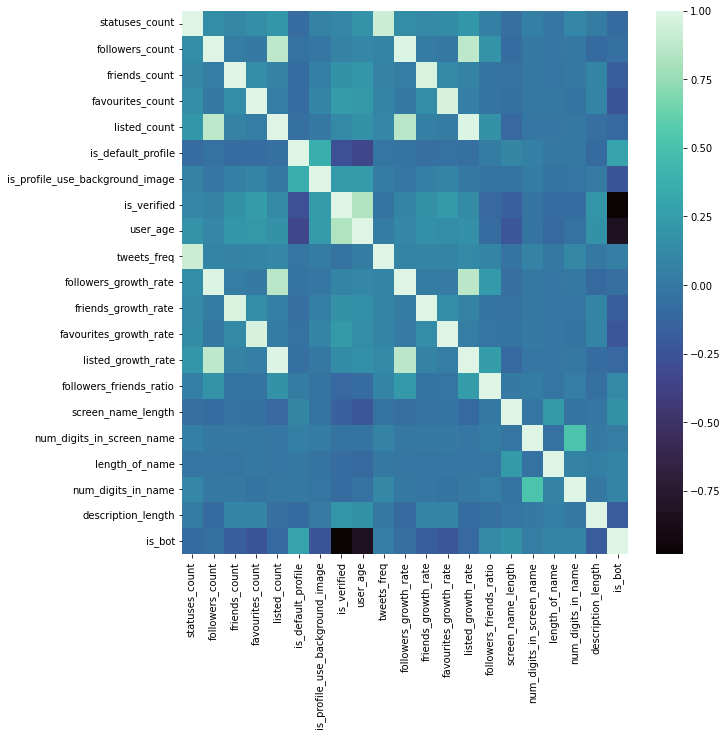

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df1.corr(), cmap = "mako")

In [12]:
# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df1.drop('is_bot', axis = 1)
Y = df1.is_bot

In [13]:
# поделили на обучающую и тестовую выборки 1:3
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 21)

In [14]:
X_train.shape, X_test.shape

((1800, 20), (600, 20))

In [15]:
len(Y_train), len(Y_test)

(1800, 600)

#### 1.1  Обучить модель без каких-либо дополнительных условий, которая должна наилучшим образом отработать на тестовой выборке преподавателя с точки зрения F-меры

F-мера (average = 
- binary - результаты только для класса, указанного параметром pos_label
- micro - глобально, подсчитывая общее количество истинных срабатываний, ложноотрицательных и ложноположительных результатов
- macro - для каждой метки, находит их невзвешенное среднее значение
- weighted - для каждой метки, находит их взвешенное среднее значение  

In [16]:
# для сравнения значений F-меры
F_measure = {'LogisticRegression':0, 
             'KNeighborsClassifier':0, 
             'DecisionTreeClassifier':0,
             'RandomForestClassifier':0 }

Логистическая регрессия

In [17]:
# Стандартизируем данные

Log = LogisticRegression()
scaler = StandardScaler()
X_train_M = scaler.fit_transform(X_train)
X_test_M = scaler.transform(X_test)

In [18]:
# обучение

model_Log = LogisticRegression()
    
model_Log.fit(X_train_M, Y_train)
Y_Log = model_Log.predict(X_test_M)

F_measure['LogisticRegression'] = f1_score(Y_test, Y_Log, average = "weighted")

K-соседей

In [19]:
# Стандартизируем данные

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

KNN = KNeighborsClassifier()
scaler = StandardScaler()

steps_KNN = [('normalizer', scaler), ('KNN', KNN)]
pipe_KNN = Pipeline(steps_KNN)

In [20]:
# обучение

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, Y_train)
Y_KNN = model_KNN.predict(X_test)

F_measure['KNeighborsClassifier'] = f1_score(Y_test, Y_KNN, average = "weighted")

DecisionTreeClassifier

In [21]:
# Стандартизируем данные

DTC = DecisionTreeClassifier()
scaler = StandardScaler()

steps_DTC = [('normalizer', scaler), ('DTC', DTC)]
pipe_DTC = Pipeline(steps_DTC)

In [22]:
# обучение

model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, Y_train)
Y_DTC = model_DTC.predict(X_test)

F_measure['DecisionTreeClassifier'] = f1_score(Y_test, Y_DTC, average = "weighted")

RandomForestClassifier

In [23]:
# Стандартизируем данные

RFC = RandomForestClassifier()
scaler = StandardScaler()

steps_RFC = [('normalizer', scaler), ('RFC', RFC)]
pipe_RFC = Pipeline(steps_RFC)

In [24]:
# обучение

model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, Y_train)
Y_RFC = model_RFC.predict(X_test)

F_measure['RandomForestClassifier'] = f1_score(Y_test, Y_RFC, average = "weighted")

In [25]:
maxim = 0

for i, j in F_measure.items():

    if j > maxim:
        maxim = j
        model_max = i
print ('Наибольшее значение F-меры:', maxim, '.  Модель:', model_max)


Наибольшее значение F-меры: 0.9983315321915928 .  Модель: RandomForestClassifier


In [26]:
# сохраняем лучшую модель
joblib.dump(model_Log, 'model_Log.pkl')

['model_Log.pkl']

#### 2.1. Максимально логичным образом обучить качественную модель, использующую для работы только 10 признаков из всего исходного множества.

#### 2.1.1 Отбор наиболее информативных признаков для различных моделей при помощи графика с важностью коэфициентов

In [27]:
# Функция для вывода графика с важностью коэфициентов при соответствующих признаках

def barh_plot(model, X_data):
    attribute = X_data.columns.values
    
    # значение важности оцениваем по модулю
    importance = abs(model.coef_)
   
    list1 = pd.DataFrame(data = {'importance': importance, 'attribute': X_data.columns, }).sort_values(by = 'importance')
    list2 = list1.sort_values(by='importance', ascending=False)
    print(list2)
    sns.barplot(data = list2, y = 'attribute', x = 'importance')
    
    return list2


In [28]:
# нормировка данных 

scaler = StandardScaler()
X_train_M = scaler.fit_transform(X_train)
X_test_M = scaler.transform(X_test)

Линейная регрессия

    importance                        attribute
7     0.390322                      is_verified
13    0.062824               listed_growth_rate
4     0.062665                     listed_count
8     0.037449                         user_age
11    0.030482              friends_growth_rate
2     0.029799                    friends_count
12    0.019379           favourites_growth_rate
1     0.018593                  followers_count
10    0.018279            followers_growth_rate
3     0.017070                 favourites_count
16    0.006473        num_digits_in_screen_name
5     0.003798               is_default_profile
9     0.003611                      tweets_freq
6     0.003121  is_profile_use_background_image
14    0.002499          followers_friends_ratio
0     0.001841                   statuses_count
17    0.001560                   length_of_name
19    0.001279               description_length
15    0.001008               screen_name_length
18    0.000029               num_digits_

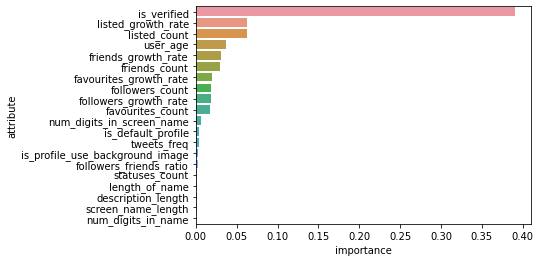

In [29]:
model_regress = LinearRegression()
model_regress.fit(X_train_M, Y_train)
pred_train = model_regress.predict(X_train_M)
pred_test = model_regress.predict(X_test_M)

list_log = barh_plot(model_regress, X_train)

Модель Ridge

    importance                        attribute
7     0.390310                      is_verified
13    0.061893               listed_growth_rate
4     0.061678                     listed_count
8     0.037456                         user_age
11    0.030461              friends_growth_rate
2     0.029777                    friends_count
12    0.019418           favourites_growth_rate
1     0.017929                  followers_count
10    0.017664            followers_growth_rate
3     0.017105                 favourites_count
16    0.006470        num_digits_in_screen_name
5     0.003803               is_default_profile
9     0.003610                      tweets_freq
6     0.003123  is_profile_use_background_image
14    0.002453          followers_friends_ratio
0     0.001840                   statuses_count
17    0.001559                   length_of_name
19    0.001280               description_length
15    0.001008               screen_name_length
18    0.000030               num_digits_

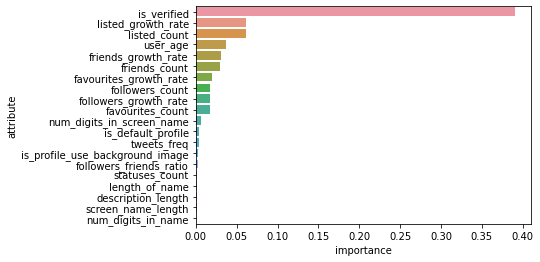

In [30]:
model_ridge = Ridge(alpha = 0.04)
model_ridge.fit(X_train_M, Y_train)
pred_ridge_train = model_ridge.predict(X_train_M)
pred_ridge_test = model_ridge.predict(X_test_M)

list_rige = barh_plot(model_ridge, X_train)

#### 2.1.2 Отбор наиболее информативных признаков при помощи SelectKBest и Extra Tree Classifier

In [31]:
list_log['attribute'].loc[:10]
list_rige['attribute'].loc[:10]

7                is_verified
13        listed_growth_rate
4               listed_count
8                   user_age
11       friends_growth_rate
2              friends_count
12    favourites_growth_rate
1            followers_count
10     followers_growth_rate
Name: attribute, dtype: object

In [32]:
from sklearn import preprocessing

In [33]:
K = 10

In [34]:
# При помощи SelectKBest. DataFrame с признаками и их информативностью, отсортированный по убыванию

best_features1 = SelectKBest(score_func=chi2, k=K)
fit = best_features1.fit(X.values, Y.values)

best_features1 = pd.DataFrame(data=fit.scores_, index = X.columns, columns=['chi2_score'])
best_features1['number'] = pd.Series(range(X.shape[1]), index = best_features1.index)

sel_best = best_features1.nlargest(K, 'chi2_score')
sel_best

,chi2_score,number
followers_count,6.568911e+07,1
followers_friends_ratio,9.749806e+06,14
favourites_count,8.109731e+06,3
statuses_count,2.747301e+06,0
friends_count,1.388549e+06,2
user_age,7.447282e+05,8
listed_count,4.817762e+05,4
followers_growth_rate,1.412058e+04,10
favourites_growth_rate,2.046060e+03,12
description_length,1.438377e+03,19


In [35]:
# При помощи ExtraTreesClassifier. DataFrame с признаками и их информативностью, отсортированный по убыванию
model2 = ExtraTreesClassifier()
model2 = model2.fit(X.values, Y.values.ravel())

best_features2 = pd.DataFrame(data = model2.feature_importances_, index = X.columns, columns=['feature_importance'])
best_features2['number'] = pd.Series(range(X.shape[1]), index = best_features2.index)

ex_trees = best_features2.nlargest(K, 'feature_importance')
ex_trees

,feature_importance,number
is_verified,0.586655,7
user_age,0.202571,8
favourites_count,0.038214,3
is_profile_use_background_image,0.031182,6
is_default_profile,0.028586,5
favourites_growth_rate,0.022276,12
friends_growth_rate,0.018012,11
followers_friends_ratio,0.015995,14
friends_count,0.012228,2
listed_count,0.006920,4


Признаки, которые хорошо себя показали во всех трех случаях:
    
- is_verified
- user_age
- listed_count
- friends_growth_rate
- favourites_count
- followers_growth_rate
- is_default_profile
- is_profile_use_background_image
- statuses_count
- friends_count

In [36]:
# Удаляем 10 наименее значимых

df_best = df1.drop(columns = ['followers_count', 
                           'tweets_freq', 
                            'favourites_growth_rate', 
                            'listed_growth_rate',
                            'followers_friends_ratio', 
                            'screen_name_length',
                            'num_digits_in_screen_name', 
                            'length_of_name', 
                            'num_digits_in_name',
                            'description_length'])

df_best.head()

,statuses_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,followers_growth_rate,friends_growth_rate,is_bot
0,5124,3074,13768,126,0,0,1,2711,2.449650,1.133899,0
1,10672,1575,4561,191,0,1,1,4424,1.913427,0.356013,0
2,704,454,2400,77,0,0,0,1358,2.288660,0.334315,0
3,6091,526,599,1515,0,1,1,4214,72.265781,0.124822,0
4,12967,204,1177,452,0,1,1,3200,4.279063,0.063750,0


<AxesSubplot: >

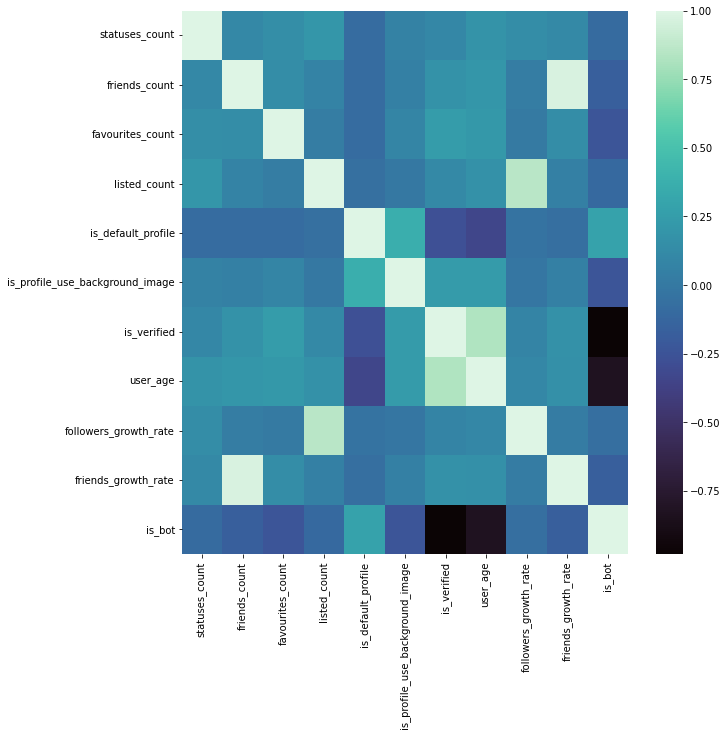

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_best.corr(), cmap = "mako")

In [38]:
# делим на обучающую и тестовую
X = df_best.drop('is_bot', axis = 1)
Y = df_best.is_bot

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 21)


# Стандартизируем данные
KNN = KNeighborsClassifier()
scaler = StandardScaler()

steps_KNN = [('normalizer', scaler), ('KNN', KNN)]
pipe_KNN = Pipeline(steps_KNN)


# С помощью GridSearchCV производим подбор гиперпараметров:
# n_neighbors - это количество соседей, которые нужно использовать, 
# weights - весовая функция,используемая при прогнозировании
# algorithm - алгоритм, используемый для вычисления ближайших соседей
params_KNN = \
     {'KNN__n_neighbors': np.arange(5, 50), 
     'KNN__weights': ['uniform', 'distance'], 
     'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search_KNN = GridSearchCV(pipe_KNN, params_KNN)
grid_search_KNN.fit(X_train, Y_train)

grid_search_KNN.best_params_

{'KNN__algorithm': 'auto', 'KNN__n_neighbors': 34, 'KNN__weights': 'uniform'}

In [39]:
# Обучаем модель с лучшими параметрами

model_KNN = KNeighborsClassifier(algorithm = grid_search_KNN.best_params_['KNN__algorithm'], 
                                 n_neighbors = grid_search_KNN.best_params_['KNN__n_neighbors'], 
                                 weights = grid_search_KNN.best_params_['KNN__weights'])
model_KNN.fit(X_train, Y_train)
Y_KNN = model_KNN.predict(X_test)

conf_mat_KNN = confusion_matrix(Y_test, Y_KNN)

In [40]:
print(classification_report(Y_test, model_KNN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       447
           1       0.96      0.92      0.94       153

    accuracy                           0.97       600
   macro avg       0.97      0.95      0.96       600
weighted avg       0.97      0.97      0.97       600



In [41]:
# сохраняем
joblib.dump(model_KNN, 'model_KNN.pkl')

['model_KNN.pkl']

#### 2.2. Обучить модель, обеспечивающую вероятность пропуска бота на уровне не выше 0.03, и имеющую насколько возможно низкую вероятность ложного обнаружения.

Метрики:


Accuracy = (TP + TN)/(TP + TN + FP + FN)

Precision = TP/(TP + FP)

Recall =  TP/(TP + FN)


Можно через матрицу ошибок:


- TP (true positive, истинно положительные, объект верно отнесён к данному классу) - сумма диагональных элементов
- FP (false positive, ложно положительные, объект неверно отнесён к данному классу) - это сумма соответствующего столбца, за вычетом диагонального элемента
- TN (true negative, истинно отрицательные, верно определено, что объект не принадлежит к данному классу) - удалить соответствующие столбец и строку из матрицы, а затем суммировать все остальные элементы
- FN (false negative, ложно отрицательные, неверно определено, что объект не принадлежит к данному классу) - сумму соответствующей строки, за вычетом диагонального элемента


- Ложное обнаружение - ошибка 1 рода (Type I Error) - объект ошибочно относится к положительному классу ( = FP / количество в тестовой выборке).

- Пропуск бота - ошибка 2 рода (Type II Error) - объект ошибочно относится к отрицательному классу ( = FN / количество в тестовой выборке).



In [42]:
# для сравнения ошибок первого и второго рода
Error_I = {'LogisticRegression':0, 
             'KNeighborsClassifier':0, 
             'DecisionTreeClassifier':0,
             'RandomForestClassifier':0 }


Error_II = {'LogisticRegression':0, 
             'KNeighborsClassifier':0, 
             'DecisionTreeClassifier':0,
             'RandomForestClassifier':0 }

In [43]:
# Работаем с полным набором признаков
X = df1.drop('is_bot', axis = 1)
Y = df1.is_bot

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 21)

In [45]:
# количество в тестовой выборке
M = Y_test.shape[0]

In [46]:
# расчет метрик по матрице ошибок

def Metrics (conf_mat):
    Metrics_list = []
    num_classes = 2
    
    FP_val = []
    for i in range(num_classes):    
        FP_val.append(sum(conf_mat[:,i]) - conf_mat[i,i])
    FP = sum(FP_val)
    
    FN_val = []
    for i in range(num_classes):
        FN_val.append(sum(conf_mat[i,:]) - conf_mat[i,i])
    FN = (sum(FN_val))
    
    Metrics_list.append(FP)
    Metrics_list.append(FN)

    return Metrics_list

Логистическая регрессия

In [47]:
# Стандартизируем данные

Log = LogisticRegression()
scaler = StandardScaler()
X_train_M = scaler.fit_transform(X_train)
X_test_M = scaler.transform(X_test)

In [48]:
# обучение

model_Log = LogisticRegression() 
model_Log.fit(X_train_M, Y_train)
Y_Log = model_Log.predict(X_test_M)

In [49]:
conf_mat_Log = confusion_matrix(Y_test, Y_Log)
Error_I['LogisticRegression'] = Metrics (conf_mat_Log)[0] / M
Error_II['LogisticRegression'] = Metrics (conf_mat_Log)[1] / M

K-соседей

In [50]:
# Стандартизируем данные

KNN = KNeighborsClassifier()
scaler = StandardScaler()

steps_KNN = [('normalizer', scaler), ('KNN', KNN)]
pipe_KNN = Pipeline(steps_KNN)

In [51]:
# С помощью GridSearchCV производим подбор гиперпараметров:
# n_neighbors - это количество соседей, которые нужно использовать, 
# weights - весовая функция,используемая при прогнозировании
# algorithm - алгоритм, используемый для вычисления ближайших соседей


params_KNN = \
     {'KNN__n_neighbors': np.arange(5, 50), 
     'KNN__weights': ['uniform', 'distance'], 
     'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search_KNN = GridSearchCV(pipe_KNN, params_KNN)
grid_search_KNN.fit(X_train, Y_train)

grid_search_KNN.best_params_

{'KNN__algorithm': 'auto', 'KNN__n_neighbors': 5, 'KNN__weights': 'distance'}

In [52]:
# Обучаем модель с лучшими параметрами

model_KNN = KNeighborsClassifier(algorithm = grid_search_KNN.best_params_['KNN__algorithm'], 
                                 n_neighbors = grid_search_KNN.best_params_['KNN__n_neighbors'], 
                                 weights = grid_search_KNN.best_params_['KNN__weights'])
model_KNN.fit(X_train, Y_train)
Y_KNN = model_KNN.predict(X_test)

In [53]:
conf_mat_KNN = confusion_matrix(Y_test, Y_KNN)
Error_I['KNeighborsClassifier'] = Metrics (conf_mat_KNN)[0] / M
Error_II['KNeighborsClassifier'] = Metrics (conf_mat_KNN)[1] / M

Дерево решений

In [54]:
# Стандартизируем данные

DTC = DecisionTreeClassifier()
scaler = StandardScaler()

steps_DTC = [('normalizer', scaler), ('DTC', DTC)]
pipe_DTC = Pipeline(steps_DTC)

In [55]:
# Подбираем гиперпараметры

params_DTC = \
     {'DTC__max_depth': np.arange(1, 10),
     'DTC__splitter': ['best', 'random'],
     'DTC__criterion': ['gini', 'entropy']}

grid_search_DTC = GridSearchCV(pipe_DTC, params_DTC)
grid_search_DTC.fit(X_train, Y_train)
grid_search_DTC.best_params_


{'DTC__criterion': 'gini', 'DTC__max_depth': 6, 'DTC__splitter': 'random'}

In [56]:
# Обучаем модель с лучшими параметрами

model_DTC = DecisionTreeClassifier(max_depth = grid_search_DTC.best_params_['DTC__max_depth'], 
                                 splitter = grid_search_DTC.best_params_['DTC__splitter'], 
                                 criterion = grid_search_DTC.best_params_['DTC__criterion'])
model_DTC.fit(X_train, Y_train)
Y_DTC = model_DTC.predict(X_test)

In [57]:
conf_mat_DTC = confusion_matrix(Y_test, Y_DTC)
Error_I['DecisionTreeClassifier'] = Metrics (conf_mat_DTC)[0] / M
Error_II['DecisionTreeClassifier'] = Metrics (conf_mat_DTC)[1] / M

Случайный лес

In [58]:
# Стандартизируем данные

RFC = RandomForestClassifier()
scaler = StandardScaler()

steps_RFC = [('normalizer', scaler), ('RFC', RFC)]
pipe_RFC = Pipeline(steps_RFC)

In [59]:
#Подбираем гиперпараметры

params_RFC = \
     {'RFC__n_estimators': np.arange(10, 100),
     'RFC__criterion': ['gini', 'entropy']}
grid_search_RFC = GridSearchCV(pipe_RFC, params_RFC)
grid_search_RFC.fit(X_train, Y_train)
grid_search_RFC.best_params_

{'RFC__criterion': 'entropy', 'RFC__n_estimators': 27}

In [60]:
# Обучаем модель с лучшими параметрами

model_RFC = RandomForestClassifier(n_estimators = grid_search_RFC.best_params_['RFC__n_estimators'], 
                                 criterion = grid_search_RFC.best_params_['RFC__criterion'])
model_RFC.fit(X_train, Y_train)
Y_RFC = model_RFC.predict(X_test)

In [61]:
conf_mat_RFC = confusion_matrix(Y_test, Y_RFC)
Error_I['RandomForestClassifier'] = Metrics (conf_mat_RFC)[0] / M
Error_II['RandomForestClassifier'] = Metrics (conf_mat_RFC)[1] / M

Сравниваем значения ошибок первого и второго рода у различных моделей

In [62]:
Error_II

{'LogisticRegression': 0.0033333333333333335,
 'KNeighborsClassifier': 0.015,
 'DecisionTreeClassifier': 0.0016666666666666668,
 'RandomForestClassifier': 0.0016666666666666668}

Ошибка II рода ни в одном случае не превышает 0,03

In [63]:
minim = 1

for i, j in Error_I.items():
    if j < minim:
        minim = j
        model_min = i
print ('Наименьшая ошибка первого рода:', minim, '.  Модель:', model_min)


Наименьшая ошибка первого рода: 0.0016666666666666668 .  Модель: DecisionTreeClassifier


In [64]:
report_RFC = classification_report(Y_test, Y_RFC)
print(report_RFC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      0.99      1.00       153

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



Вывод:  

- Наименьшую ошибку первого рода дает модель RandomForestClassifier
        
- Ошибка второго рода не превышает 0,03 у всех четырех моделей. Но наименьшая у DecisionTreeClassifier и RandomForestClassifier
        

In [65]:
# сохраняем "удачные" модели 
joblib.dump(model_RFC, 'model_RFC.pkl')

['model_RFC.pkl']

In [66]:
joblib.dump(model_DTC, 'model_DTC.pkl')

['model_DTC.pkl']